In [81]:
from core.traders.MA_Trader import MA_Trader
from core.traders.baselines import Point2Point_trader
from core.environment.environment import Environment
from core.analitics.basic_plots import plot_line_buysell, to_pandas
from datetime import timedelta, datetime
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
env = Environment(start_time=datetime.fromisoformat('2020-02-01 00:00:00'), 
                  time_delta='1h'
                 )
model = MA_Trader(environment=env, column_name='close', period_long=40, period_short=12)

In [15]:
class tunner:
    def __init__(self, model, **kargs):
        self.model = model
        
    def fit(self, X, y):
        self.model.env.restart()
        model.evalueate()
        return self
    
    def score(self):
        return model.score()
    
    def predict(self, X):
        return model.trade_record
    
    def set_params(self, params):
        model.set_params(params)
        return self
    
    def get_params(self, deep=True):
        return model.get_params()

In [181]:
params = {'environment': [env],
          'column_name': ['close'],
          'period_short': [8,10,12,14,16],
          'period_long': [20,25,30,35,40],
          'panic': [-.02, -.025, -.03, -.035, -.04]
        }

In [182]:
gs = GridSearchCV(model, params, cv=2, verbose=10, n_jobs=2)

In [183]:
gs.fit(np.zeros([100,2]),np.ones(100))

Fitting 2 folds for each of 125 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   48.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.5min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  7.4min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  9.0min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 11.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 13.5min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 16.4min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 19.0min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed: 22.5min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 25.8min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed: 30.1min
[Parallel(

GridSearchCV(cv=2, error_score=nan,
             estimator=MA_Trader(column_name='close',
                                 environment=<core.environment.environment.Environment object at 0x7fb2516ade50>,
                                 panic=-0.03, period_long=25, period_short=10),
             iid='deprecated', n_jobs=2,
             param_grid={'column_name': ['close'],
                         'environment': [<core.environment.environment.Environment object at 0x7fb2516ade50>],
                         'panic': [-0.02, -0.025, -0.03, -0.035, -0.04],
                         'period_long': [20, 25, 30, 35, 40],
                         'period_short': [8, 10, 12, 14, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [184]:
gs.best_score_

121.24025596715491

In [189]:
gs.best_params_

{'column_name': 'close',
 'environment': <core.environment.environment.Environment at 0x7fb2516ade50>,
 'panic': -0.03,
 'period_long': 25,
 'period_short': 14}

In [56]:
gs.cv_results_

{'mean_fit_time': array([41.11536348, 41.27377439, 41.50025249, 41.46849644, 42.7463994 ,
        42.78276598, 41.82758403, 41.88517547, 40.61725032, 40.90189993,
        42.488778  , 42.52796257, 41.38656008, 41.6360606 , 42.32740271,
        42.4951694 , 42.19221652, 42.47205448, 42.19001031, 41.76691902]),
 'std_fit_time': array([0.0549196 , 0.08274174, 0.17392969, 0.18138945, 0.01359463,
        0.05099618, 0.1377542 , 0.09217954, 0.08193243, 0.04706991,
        0.05029213, 0.04676259, 0.01906002, 0.09877551, 0.04723847,
        0.06351447, 0.0681566 , 0.00707555, 0.1017065 , 0.01995909]),
 'mean_score_time': array([0.0377326 , 0.03541756, 0.04763496, 0.06749356, 0.03480065,
        0.0492655 , 0.03853047, 0.04180491, 0.04070246, 0.04005754,
        0.03481245, 0.04311395, 0.04195094, 0.03796494, 0.03686237,
        0.03917551, 0.03607404, 0.03674245, 0.03485501, 0.01909065]),
 'std_score_time': array([0.00142932, 0.00172567, 0.01355588, 0.03212154, 0.00251949,
        0.01073062, 

In [177]:
model = MA_Trader(environment=env.restart(), column_name='close', period_long=25, period_short=10, panic=-.03)
model.evaluate()

In [28]:
p2p = Point2Point_trader(env.restart())

In [29]:
p2p.evaluate()

In [32]:
p2p.score(1,1)

49.46078415699766

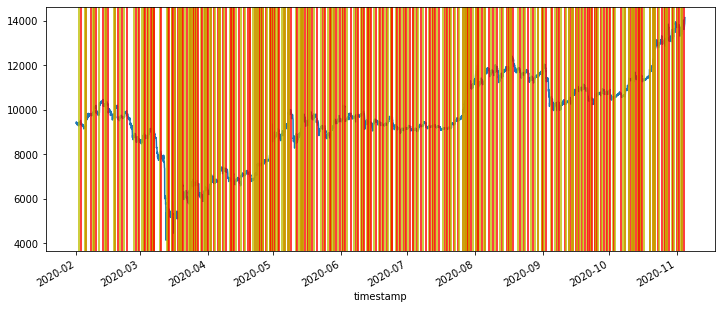

In [170]:
plot_line_buysell(model)

In [178]:
model.score(1,1)

91.63032079837829

In [186]:
res = to_pandas(model)

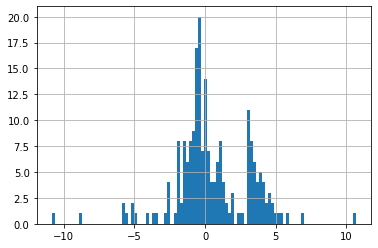

In [187]:
res.gan.hist(bins=100)

In [185]:
len(res)*0.015

3.12

In [124]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
np.squeeze

/Users/guidosidoni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/guidosidoni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


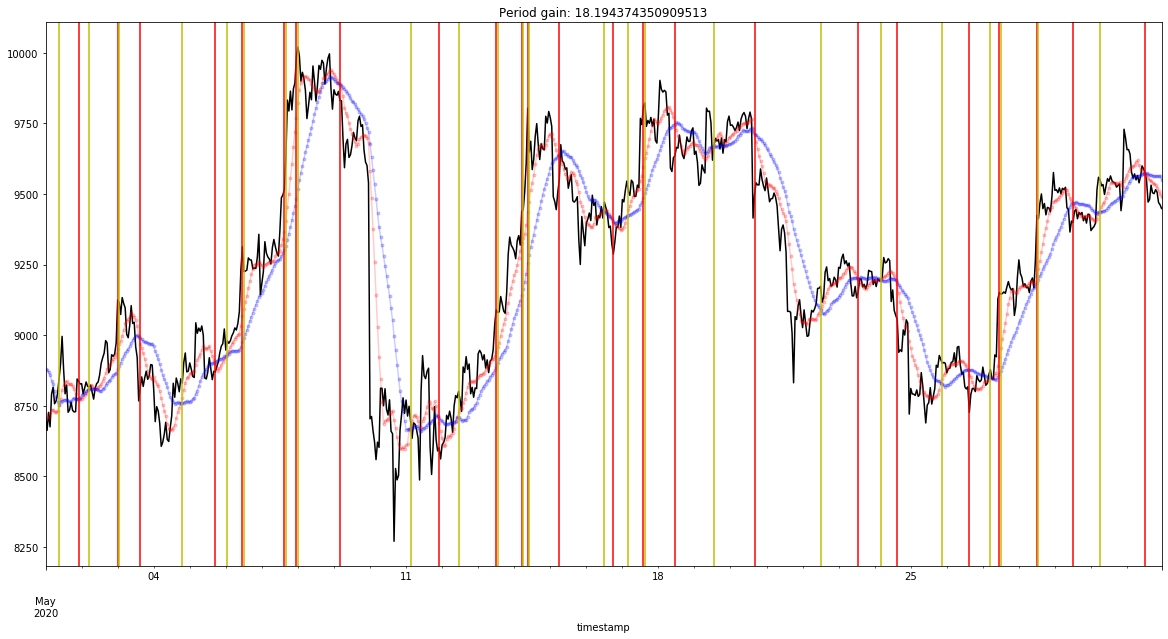

In [188]:
month = 5
result_pd = to_pandas(model)
result_pd = result_pd[result_pd.start_datetime.dt.month == month]
data = model.env.get_data()
data.loc[:,'malong'] = model.ma_long.evaluate(data)
data.loc[:,'mashort'] = model.ma_short.evaluate(data)
data = data[data.index.month==month]
data.close.plot(figsize=(20,10), color='black')
data.mashort.plot(marker='.', color='r', alpha=.2)
data.malong.plot(marker='.', color='b', alpha=.2)
for init, end in zip(result_pd.start_datetime, result_pd.end_datetime):
    pl.axvline(init, color='y')
    pl.axvline(end, color='r')
    
    plt.title('Period gain: {}'.format(result_pd.gan.sum()))

13784.59

In [112]:
pd.DataFrame(serie)

,close
timestamp,
2020-05-01 00:00:00,8707.51
2020-05-01 01:00:00,8662.61
2020-05-01 02:00:00,8726.36
2020-05-01 03:00:00,8675.35
2020-05-01 04:00:00,8791.59
...,...
2020-05-31 19:00:00,9514.74
2020-05-31 20:00:00,9506.60
2020-05-31 21:00:00,9469.35
